In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
bck_filen = 'initial_scan_20220304_background.csv'
back_df = pd.read_csv(os.path.join('/home/parfa30/DATA/',bck_filen))

Text(0.5, 1.0, 'Background')

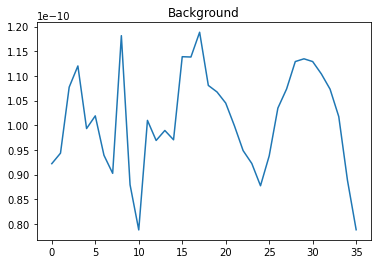

In [18]:
plt.plot(list(back_df['mean']))
plt.title('Background')

In [19]:
back_df.head()

,Start,End,filen,ExpTime,X,Y,wave,mean,median
0,2022-03-04 18:18:14.512781,2022-03-04 18:18:19.527089,/home/parfa30/DATA/electrometer_files/16464178...,5,1000.01001,500.00000,440,9.221643e-11,9.268200e-11
1,2022-03-04 18:18:32.056676,2022-03-04 18:18:37.071111,/home/parfa30/DATA/electrometer_files/16464179...,5,999.97998,599.98999,440,9.434478e-11,9.500600e-11
2,2022-03-04 18:18:49.583738,2022-03-04 18:18:54.598186,/home/parfa30/DATA/electrometer_files/16464179...,5,1000.01001,699.98999,440,1.077335e-10,1.076990e-10
3,2022-03-04 18:19:07.104967,2022-03-04 18:19:12.118268,/home/parfa30/DATA/electrometer_files/16464179...,5,1000.01001,800.00000,440,1.120299e-10,1.136960e-10
4,2022-03-04 18:19:24.618036,2022-03-04 18:19:29.632232,/home/parfa30/DATA/electrometer_files/16464179...,5,1000.01001,899.98999,440,9.933510e-11,9.836000e-11


In [16]:
background_val = np.mean(back_df['mean'])

In [20]:
from scipy import interpolate
b = interpolate.interp2d(list(back_df.X), list(back_df.Y), list(back_df['mean']))

/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-2.0.0/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,7 m=36 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [28]:
back_ = b(xx, yy)

In [29]:
data_df_2 = pd.read_csv(os.path.join('/home/parfa30/DATA/','initial_scan_20220304_2.csv'))
data_df = pd.read_csv(os.path.join('/home/parfa30/DATA/','initial_scan_20220304.csv'))

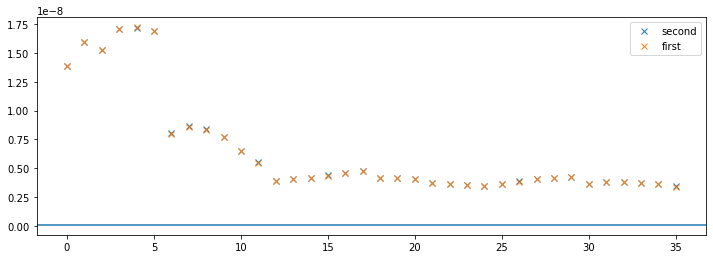

In [32]:
plt.figure(figsize=(12,4))
plt.plot(data_df_2['mean'],'x',label='second')
plt.plot(data_df['mean']-background,'x',label='first')
plt.axhline(background)
plt.legend()